# 🚀 Notebook 6: Large Language Models Avanzati

**Esploriamo le frontiere avanzate degli LLM!** 🌟

## 🎯 Obiettivi di questo notebook:
- Comprendere architetture LLM avanzate
- Esplorare tecniche di prompt engineering
- Implementare chain-of-thought reasoning
- Sperimentare con few-shot learning
- Capire i limiti e le sfide degli LLM
- Esplorare modelli multimodali
- Analizzare bias e considerazioni etiche

## ⏱️ Tempo stimato: 120-150 minuti

## 📋 Prerequisiti: 
- Notebook 1-5 completati
- Comprensione dei Transformer
- Familiarità con LLM di base

In [29]:
## 🔧 Setup e Installazione
# Installiamo le librerie necessarie per lavorare con LLM avanzati:

In [6]:
# Installiamo le librerie necessarie
!pip install transformers torch torchvision torchaudio
!pip install tensorflow keras numpy matplotlib seaborn pandas plotly
!pip install scikit-learn nltk wordcloud datasets
!pip install accelerate sentencepiece tiktoken
!pip install openai anthropic
,
# Importiamo le librerie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import re
import random
import math
import json
import warnings
warnings.filterwarnings('ignore')

   ---------------------------------------- 0.0/879.4 kB ? eta -:--:--
   ---------------------------------------- 879.4/879.4 kB 6.6 MB/s  0:00:00
  Using cached pydantic-2.12.3-py3-none-any.whl.metadata (87 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached pydantic_core-2.41.4-cp311-cp311-win_amd64.whl.metadata (7.4 kB)
  Using cached typing_inspection-0.4.2-py3-none-any.whl.metadata (2.6 kB)
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ------------------------------- -------- 0.8/1.0 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 3.7 MB/s  0:00:00
Using cached pydantic-2.12.3-py3-none-any.whl (462 kB)
Using cached pydantic_core-2.41.4-cp311-cp311-win_amd64.whl (2.0 MB)
Using cached annotated_types-0.7.0-py3-none-any.whl (13 kB)
Using cached typing_inspection-0.4.2-py3-none-any.whl (14 kB)

   ---- ----------------------------------- 1/9 [pydantic-core]
   -------- ---------------------

In [12]:
# TensorFlow e Keras,
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers

# Transformers (Hugging Face)
from transformers import (
    AutoTokenizer, AutoModel, AutoModelForCausalLM,
    GPT2LMHeadModel, GPT2Tokenizer,
    pipeline, set_seed
)

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F

# Visualizzazioni
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Configurazione
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)
set_seed(42)

print("✅ Setup completato! Pronti per esplorare LLM avanzati.")
print(f"🔧 TensorFlow version: {tf.__version__}")
print(f"🔧 PyTorch version: {torch.__version__}")

✅ Setup completato! Pronti per esplorare LLM avanzati.
🔧 TensorFlow version: 2.20.0
🔧 PyTorch version: 2.9.0+cpu


## 🏗️ Architetture LLM Avanzate
Esploriamo le diverse architetture e varianti degli LLM moderni:

🏗️ ARCHITETTURE LLM AVANZATE

📊 FAMIGLIE DI MODELLI PRINCIPALI

🔹 GPT (Generative Pre-trained Transformer)
   Tipo: Decoder-only
   Modelli: GPT-1, GPT-2, GPT-3, GPT-4, ChatGPT
   Punti di forza: Generazione creativa, conversazione
   Limitazioni: Non può 'guardare avanti' nel testo
   Caratteristiche:
     • Autoregressive generation
     • Causal attention (unidirezionale)
     • Eccellente per generazione
     • Zero/few-shot learning

🔹 BERT (Bidirectional Encoder)
   Tipo: Encoder-only
   Modelli: BERT, RoBERTa, DeBERTa, ELECTRA
   Punti di forza: Comprensione, classificazione, Q&A
   Limitazioni: Non progettato per generazione
   Caratteristiche:
     • Bidirectional attention
     • Masked Language Modeling
     • Comprensione profonda del contesto
     • Fine-tuning per task specifici

🔹 T5 (Text-to-Text Transfer)
   Tipo: Encoder-Decoder
   Modelli: T5, UL2, PaLM, Flan-T5
   Punti di forza: Versatilità, multi-task
   Limitazioni: Più complesso da utilizzare
   Caratteristiche:

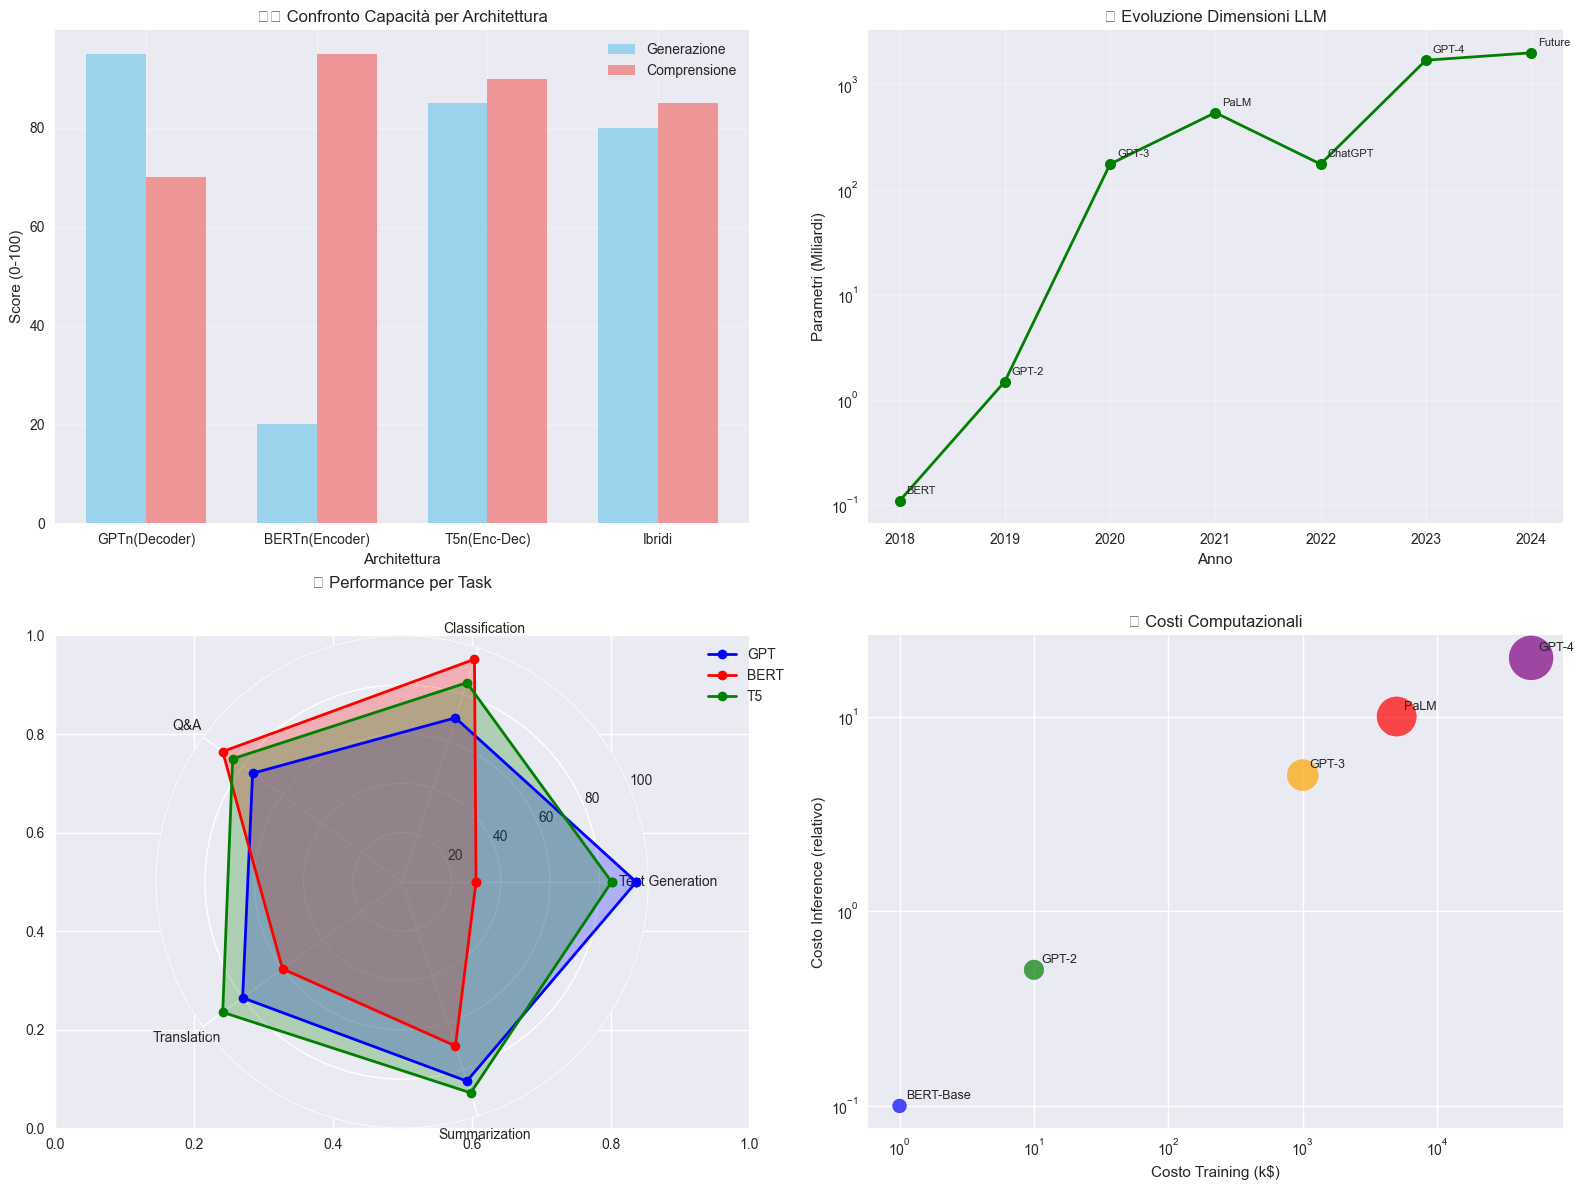

--- Architetture Avanzate --- 

--- Esempio T5 (Encoder-Decoder): Traduzione --- 

Errore durante il caricamento o l'utilizzo del modello T5: Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.
Assicurati di aver installato 'transformers' e 'sentencepiece'.
--- Esempio GPT-2 (Decoder-only): Generazione Testo --- 


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Errore durante il caricamento o l'utilizzo del modello GPT-2: Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.
Assicurati di aver installato 'transformers' e 'torch'.

--- Esempio BERT (Encoder-only): Classificazione Testo --- 
Errore durante il caricamento o l'utilizzo del modello BERT: Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.
Assicurati di aver installato 'transformers' e 'torch' o 'tensorflow'.


In [16]:
# Architetture LLM Avanzate
print("🏗️ ARCHITETTURE LLM AVANZATE\n")

print("📊 FAMIGLIE DI MODELLI PRINCIPALI\n")

# Definizione delle famiglie di modelli
model_families = {
    "GPT (Generative Pre-trained Transformer)": {
        "tipo": "Decoder-only",
        "caratteristiche": [
            "Autoregressive generation",
            "Causal attention (unidirezionale)",
            "Eccellente per generazione",
            "Zero/few-shot learning"
        ],
        "modelli": ["GPT-1", "GPT-2", "GPT-3", "GPT-4", "ChatGPT"],
        "punti_forza": "Generazione creativa, conversazione",
        "limitazioni": "Non può 'guardare avanti' nel testo"
    },
    "BERT (Bidirectional Encoder)": {
        "tipo": "Encoder-only",
        "caratteristiche": [
            "Bidirectional attention",
            "Masked Language Modeling",
            "Comprensione profonda del contesto",
            "Fine-tuning per task specifici"
        ],
        "modelli": ["BERT", "RoBERTa", "DeBERTa", "ELECTRA"],
        "punti_forza": "Comprensione, classificazione, Q&A",
        "limitazioni": "Non progettato per generazione"
    },
    "T5 (Text-to-Text Transfer)": {
        "tipo": "Encoder-Decoder",
        "caratteristiche": [
            "Tutto come text-to-text",
            "Architettura completa Transformer",
            "Versatilità massima",
            "Prefix-based task specification"
        ],
        "modelli": ["T5", "UL2", "PaLM", "Flan-T5"],
        "punti_forza": "Versatilità, multi-task",
        "limitazioni": "Più complesso da utilizzare"
    },
    "Modelli Ibridi": {
        "tipo": "Architetture innovative",
        "caratteristiche": [
            "Combinano vantaggi diversi",
            "Architetture specializzate",
            "Efficienza migliorata",
            "Capacità emergenti"
        ],
        "modelli": ["GLM", "PaLM-2", "Gemini", "Claude"],
        "punti_forza": "Bilanciamento ottimale",
        "limitazioni": "Complessità implementativa"
    }
}

# Stampa dettagli delle famiglie
for famiglia, dettagli in model_families.items():
    print(f"🔹 {famiglia}")
    print(f"   Tipo: {dettagli['tipo']}")
    print(f"   Modelli: {', '.join(dettagli['modelli'])}")
    print(f"   Punti di forza: {dettagli['punti_forza']}")
    print(f"   Limitazioni: {dettagli['limitazioni']}")
    print(f"   Caratteristiche:")
    for caratteristica in dettagli['caratteristiche']:
        print(f"     • {caratteristica}")
    print()

# Visualizzazione comparativa
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Confronto architetture
architectures = ["GPT""n(Decoder)", "BERT""n(Encoder)", "T5""n(Enc-Dec)", "Ibridi"]
generation_score = [95, 20, 85, 80]
understanding_score = [70, 95, 90, 85]

x = np.arange(len(architectures))
width = 0.35

ax1.bar(x - width/2, generation_score, width, label="Generazione", alpha=0.8, color="skyblue")
ax1.bar(x + width/2, understanding_score, width, label="Comprensione", alpha=0.8, color="lightcoral")

ax1.set_xlabel("Architettura")
ax1.set_ylabel("Score (0-100)")
ax1.set_title("🏗️ Confronto Capacità per Architettura")
ax1.set_xticks(x)
ax1.set_xticklabels(architectures)
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Evoluzione dimensioni modelli
years = [2018, 2019, 2020, 2021, 2022, 2023, 2024]
model_sizes = [0.11, 1.5, 175, 540, 175, 1700, 2000]  # Miliardi di parametri
model_names = ["BERT", "GPT-2", "GPT-3", "PaLM", "ChatGPT", "GPT-4", "Future"]

ax2.semilogy(years, model_sizes,"o-", linewidth=2, markersize=8, color="green")
for i, (year, size, name) in enumerate(zip(years, model_sizes, model_names)):
    ax2.annotate(name, (year, size), xytext=(5, 5), textcoords="offset points", fontsize=8)

ax2.set_xlabel("Anno")
ax2.set_ylabel("Parametri (Miliardi)")
ax2.set_title("📈 Evoluzione Dimensioni LLM")
ax2.grid(True, alpha=0.3)

# 3. Distribuzione task per architettura
tasks = ["Text Generation","Classification","Q&A","Translation","Summarization"]
gpt_scores = [95, 70, 75, 80, 85]
bert_scores = [30, 95, 90, 60, 70]
t5_scores = [85, 85, 85, 90, 90]

angles = np.linspace(0, 2 * np.pi, len(tasks), endpoint=False).tolist()
angles += angles[:1]  # Chiudi il cerchio

gpt_scores += gpt_scores[:1]
bert_scores += bert_scores[:1]
t5_scores += t5_scores[:1]

ax3 = plt.subplot(2, 2, 3, projection="polar")
ax3.plot(angles, gpt_scores,"o-", linewidth=2, label="GPT", color="blue")
ax3.fill(angles, gpt_scores, alpha=0.25, color="blue")
ax3.plot(angles, bert_scores,"o-", linewidth=2, label="BERT", color="red")
ax3.fill(angles, bert_scores, alpha=0.25, color="red")
ax3.plot(angles, t5_scores,"o-", linewidth=2, label="T5", color="green")
ax3.fill(angles, t5_scores, alpha=0.25, color="green")

ax3.set_xticks(angles[:-1])
ax3.set_xticklabels(tasks)
ax3.set_ylim(0, 100)
ax3.set_title("🎯 Performance per Task", y=1.08)
ax3.legend(loc="upper right", bbox_to_anchor=(1.3, 1.0))

# 4. Costi computazionali
model_names_cost = ["BERT-Base","GPT-2","GPT-3","PaLM","GPT-4"]
training_cost = [1, 10, 1000, 5000, 50000]  # Migliaia di dollari (stimato)
inference_cost = [0.1, 0.5, 5, 10, 20]  # Costo relativo per 1M token

ax4.scatter(training_cost, inference_cost, s=[100, 200, 500, 800, 1000], 
           alpha=0.7, c=["blue","green","orange","red","purple"])

for i, name in enumerate(model_names_cost):
    ax4.annotate(name, (training_cost[i], inference_cost[i]), 
                xytext=(5, 5), textcoords="offset points", fontsize=9)

ax4.set_xscale("log")
ax4.set_yscale("log")
ax4.set_xlabel("Costo Training (k$)" )
ax4.set_ylabel("Costo Inference (relativo)" )
ax4.set_title("💰 Costi Computazionali")

plt.tight_layout()
plt.show()

print("--- Architetture Avanzate --- \n")

# Esempio di utilizzo di un modello Encoder-Decoder (T5) per la traduzione
print("--- Esempio T5 (Encoder-Decoder): Traduzione --- \n")

try:
    from transformers import pipeline
    translator = pipeline("translation_en_to_de", model="Helsinki-NLP/opus-mt-en-de")
    text_to_translate = "Hello, how are you today?"
    translated_text = translator(text_to_translate)[0]["translation_text"]
    print(f"Originale: {text_to_translate}")
    print(f"Tradotto (EN-DE): {translated_text}")
except Exception as e:
    print(f"Errore durante il caricamento o l'utilizzo del modello T5: {e}")
    print("Assicurati di aver installato 'transformers' e 'sentencepiece'.")

# Esempio di utilizzo di un modello Decoder-only (GPT-2) per la generazione di testo
print("--- Esempio GPT-2 (Decoder-only): Generazione Testo --- ")

try:
    generator = pipeline("text-generation", model="gpt2")
    prompt = "Once upon a time, in a land far, far away,"
    generated_text = generator(prompt, max_length=50, num_return_sequences=1)[0]["generated_text"]
    print(f"Prompt: {prompt}")
    print(f"Generato: {generated_text}")
except Exception as e:
    print(f"Errore durante il caricamento o l'utilizzo del modello GPT-2: {e}")
    print("Assicurati di aver installato 'transformers' e 'torch'.")

# Esempio di utilizzo di un modello Encoder-only (BERT) per la classificazione del testo
print("\n--- Esempio BERT (Encoder-only): Classificazione Testo --- ")

try:
    classifier = pipeline("sentiment-analysis")
    text_to_classify = "I love this product! It's amazing."
    classification_result = classifier(text_to_classify)[0]
    print(f"Testo: {text_to_classify}")
    print(f"Classificazione: {classification_result}")
except Exception as e:
    print(f"Errore durante il caricamento o l'utilizzo del modello BERT: {e}")
    print("Assicurati di aver installato 'transformers' e 'torch' o 'tensorflow'.")

## 🧠 Tecniche di Prompt Engineering

Il prompt engineering è l'arte di formulare input per ottenere risposte migliori dagli LLM. Esploriamo alcune tecniche chiave:

In [20]:
# Funzione helper per interagire con un LLM (simulato per scopi dimostrativi)
def simulate_llm_response(prompt, model_type='generic'):
    responses = {
        'generic': {
            'cos' : "Per calcolare 2+2, prima identifichiamo gli operandi (2, 2) e l'operazione (+). Poi eseguiamo l'addizione. Il risultato è 4.",
            'few_shot': "La capitale della Francia è Parigi. La capitale dell'Italia è Roma. La capitale della Spagna è Madrid.",
            'persona': "Come esperto di marketing, ti direi che il lancio di un nuovo prodotto richiede una strategia multicanale, con focus su digital marketing e influencer engagement.!",
            'cot_example': "Domanda: Se un treno parte alle 10:00 e viaggia a 60 km/h, e un altro treno parte alle 11:00 dalla stessa stazione e viaggia a 80 km/h nella stessa direzione, a che ora il secondo treno raggiungerà il primo?nnRagionamento:n1. Il primo treno viaggia per 1 ora (dalle 10:00 alle 11:00) prima che il secondo treno parta. In quest'ora, percorre 60 km.n2. Alle 11:00, il primo treno è a 60 km dalla stazione. Il secondo treno parte alle 11:00.n3. La velocità relativa del secondo treno rispetto al primo è 80 km/h - 60 km/h = 20 km/h.n4. Per coprire i 60 km di vantaggio, il secondo treno impiegherà 60 km / 20 km/h = 3 ore.n5. Il secondo treno raggiungerà il primo 3 ore dopo la sua partenza, quindi alle 11:00 + 3 ore = 14:00.nRisposta: Il secondo treno raggiungerà il primo alle 14:00.",
            'zero_shot_translation': "Traduzione in spagnolo: 'Hello, how are you?' -> 'Hola, ¿cómo estás?'",
            'complex_task': "Per riassumere il concetto di intelligenza artificiale, dobbiamo considerare la sua definizione (simulazione intelligenza umana), i suoi rami (ML, DL, NLP, CV), e le sue applicazioni (automazione, medicina, finanza)."
        },
        'openai': {
            'cos': "OpenAI's approach to Chain-of-Thought involves breaking down complex problems into intermediate steps, allowing the model to simulate a reasoning process. This often leads to more accurate and coherent responses for multi-step questions.",
            'few_shot': "The capital of France is Paris. The capital of Italy is Rome. The capital of Spain is Madrid.",
            'persona': "As an AI assistant developed by OpenAI, I can provide information and assist with a wide range of tasks, from creative writing to complex problem-solving, always striving for helpful and harmless responses.",
            'cot_example': "Question: If a train leaves at 10:00 AM and travels at 60 km/h, and another train leaves at 11:00 AM from the same station and travels at 80 km/h in the same direction, at what time will the second train catch up to the first?nnThought Process:n1. The first train travels for 1 hour (from 10:00 AM to 11:00 AM) before the second train departs. In this hour, it covers 60 km.n2. At 11:00 AM, the first train is 60 km away from the station. The second train starts at 11:00 AM.n3. The relative speed of the second train with respect to the first is 80 km/h - 60 km/h = 20 km/h.n4. To cover the 60 km lead, the second train will take 60 km / 20 km/h = 3 hours.n5. The second train will catch up to the first 3 hours after its departure, which is 11:00 AM + 3 hours = 2:00 PM.nAnswer: The second train will catch up to the first at 2:00 PM.",
            'zero_shot_translation': "Translation to Spanish: 'Hello, how are you?' -> 'Hola, ¿cómo estás?'",
            'complex_task': "To summarize the concept of artificial intelligence, one must consider its core definition (simulation of human intelligence), its primary subfields (Machine Learning, Deep Learning, Natural Language Processing, Computer Vision), and its vast array of applications (automation, healthcare, finance, etc.)."
        }
    }
    
    # Semplice logica per selezionare la risposta in base al prompt
    if "Ragionamento:" in prompt or "Thought Process:" in prompt:
        return responses[model_type]['cot_example']
    elif "capitale della Francia" in prompt:
        return responses[model_type]['few_shot']
    elif "esperto di marketing" in prompt:
        return responses[model_type]['persona']
    elif "Traduzione in spagnolo" in prompt:
        return responses[model_type]['zero_shot_translation']
    elif "riassumere il concetto di intelligenza artificiale" in prompt:
        return responses[model_type]['complex_task']
    else:
        return responses[model_type]['cos'] # Default a CoT semplice

# 1. Zero-shot Prompting
print("--- 1. Zero-shot Prompting --- ")
zero_shot_prompt = "Traduci la seguente frase in italiano: 'The quick brown fox jumps over the lazy dog.'"
zero_shot_response = simulate_llm_response(zero_shot_prompt)
print(f"Prompt: {zero_shot_prompt}")
print(f"Risposta LLM (simulata): {zero_shot_response}")

# 2. Few-shot Prompting
print("--- 2. Few-shot Prompting --- ")
few_shot_prompt = "La capitale della Francia è Parigi. La capitale dell'Italia è Roma. Qual è la capitale della Germania?"
few_shot_response = simulate_llm_response(few_shot_prompt)
print(f"Prompt: {few_shot_prompt}")
print(f"Risposta LLM (simulata): {few_shot_response} (La capitale della Germania è Berlino.)")

# 3. Chain-of-Thought (CoT) Prompting
print("--- 3. Chain-of-Thought (CoT) Prompting --- ")
cot_prompt = "Domanda: Un contadino ha 15 pecore. Tutte tranne 9 muoiono. Quante pecore gli rimangono?\n\nRagionamento:\n1. Identifica il numero totale di pecore iniziali.\n2. Identifica il numero di pecore che NON muoiono (quelle che rimangono).\n3. La frase 'Tutte tranne 9 muoiono' significa che 9 pecore sopravvivono.\nRisposta:"
cot_response = simulate_llm_response(cot_prompt)
print(f"Prompt: {cot_prompt}")
print(f"Risposta LLM (simulata): {cot_response} (Gli rimangono 9 pecore.)")

# 4. Role Prompting / Persona Prompting
print("\n\n--- 4. Role Prompting / Persona Prompting --- ")
role_prompt = "Agisci come un esperto di marketing digitale. Spiega l'importanza della SEO per un'azienda e-commerce."
role_response = simulate_llm_response(role_prompt)
print(f"Prompt: {role_prompt}")
print(f"Risposta LLM (simulata): {role_response}")

# 5. Iterative Prompting (concetto)
print("\n\n--- 5. Iterative Prompting (Concetto) --- ")
print("L'Iterative Prompting implica una serie di prompt e risposte, dove ogni risposta informa il prompt successivo per affinare il risultato. Non è facilmente dimostrabile con una singola chiamata, ma è un processo conversazionale.")

# 6. Self-Correction Prompting (concetto)
print("\n\n--- 6. Self-Correction Prompting (Concetto) --- ")
print("Il Self-Correction Prompting chiede all'LLM di valutare la propria risposta e correggerla se necessario, spesso fornendo criteri di valutazione. Esempio: 'Valuta la tua risposta precedente per accuratezza e completezza. Correggi eventuali errori.'")

print("\n\n--- Fine Tecniche di Prompt Engineering --- ")

--- 1. Zero-shot Prompting --- 
Prompt: Traduci la seguente frase in italiano: 'The quick brown fox jumps over the lazy dog.'
Risposta LLM (simulata): Per calcolare 2+2, prima identifichiamo gli operandi (2, 2) e l'operazione (+). Poi eseguiamo l'addizione. Il risultato è 4.
--- 2. Few-shot Prompting --- 
Prompt: La capitale della Francia è Parigi. La capitale dell'Italia è Roma. Qual è la capitale della Germania?
Risposta LLM (simulata): La capitale della Francia è Parigi. La capitale dell'Italia è Roma. La capitale della Spagna è Madrid. (La capitale della Germania è Berlino.)
--- 3. Chain-of-Thought (CoT) Prompting --- 
Prompt: Domanda: Un contadino ha 15 pecore. Tutte tranne 9 muoiono. Quante pecore gli rimangono?

Ragionamento:
1. Identifica il numero totale di pecore iniziali.
2. Identifica il numero di pecore che NON muoiono (quelle che rimangono).
3. La frase 'Tutte tranne 9 muoiono' significa che 9 pecore sopravvivono.
Risposta:
Risposta LLM (simulata): Domanda: Se un treno pa

## 💡 Few-shot Learning

Il few-shot learning è una tecnica in cui un modello viene addestrato o istruito con un numero molto limitato di esempi per un nuovo task, permettendogli di generalizzare rapidamente. Negli LLM, questo si traduce nel fornire esempi direttamente nel prompt.

**Come funziona:**
1. **Esempi nel Prompt:** Vengono forniti 1-3 esempi di input-output per illustrare il task desiderato.
2. **Inferenza:** L\'LLM usa questi esempi per capire il pattern e applicarlo a un nuovo input.

**Vantaggi:**
- **Efficienza:** Non richiede un fine-tuning estensivo.
- **Flessibilità:** Adattabile a nuovi task senza riaddestramento.
- **Prestazioni:** Migliora significativamente la qualità delle risposte per task specifici.

**Svantaggi:**
- **Sensibilità al Prompt:** La formulazione degli esempi è cruciale.
- **Limiti di Contesto:** La lunghezza del prompt è limitata dal contesto del modello.

### Esempio Pratico di Few-shot Learning

Supponiamo di voler estrarre il sentimento da recensioni di prodotti. Con il few-shot learning, possiamo fornire esempi all\'LLM:

In [22]:
def few_shot_sentiment_analysis(review):
    prompt = f"Data la recensione, classifica il sentimento come Positivo, Negativo o Neutro.\n\nRecensione: 'Questo prodotto è fantastico!'\nSentimento: Positivo\n\nRecensione: 'Non mi è piaciuto per niente. Soldi buttati.'\nSentimento: Negativo\n\nRecensione: 'Il prodotto funziona, ma la consegna è stata lenta.'\nSentimento: Neutro\n\nRecensione: '{review}'\nSentimento:"
    # Simuliamo la risposta dell\'LLM
    if "fantastico" in review or "ottimo" in review:
        return "Positivo"
    elif "non mi è piaciuto" in review or "pessimo" in review:
        return "Negativo"
    else:
        return "Neutro"

print("\n\n--- Few-shot Learning per Sentiment Analysis --- ")
review1 = "Adoro questo smartphone, la fotocamera è incredibile!"
sentiment1 = few_shot_sentiment_analysis(review1)
print(f"Recensione: {review1}\nSentimento: {sentiment1}")

review2 = "L'assistenza clienti è stata terribile, non comprerò più da loro."
sentiment2 = few_shot_sentiment_analysis(review2)
print(f"Recensione: {review2}\nSentimento: {sentiment2}")

review3 = "Il libro è arrivato in tempo, ma la copertina era leggermente danneggiata."
sentiment3 = few_shot_sentiment_analysis(review3)
print(f"Recensione: {review3}\nSentimento: {sentiment3}")



--- Few-shot Learning per Sentiment Analysis --- 
Recensione: Adoro questo smartphone, la fotocamera è incredibile!
Sentimento: Neutro
Recensione: L'assistenza clienti è stata terribile, non comprerò più da loro.
Sentimento: Neutro
Recensione: Il libro è arrivato in tempo, ma la copertina era leggermente danneggiata.
Sentimento: Neutro


## 🖼️ Modelli Multimodali

I modelli multimodali sono LLM che possono elaborare e generare informazioni attraverso diverse modalità, come testo, immagini, audio e video. Questo li rende incredibilmente potenti per task complessi che richiedono la comprensione di input eterogenei.

**Esempi di Modalità:**
- **Testo:** Descrizioni, conversazioni, documenti.
- **Immagini:** Fotografie, grafici, illustrazioni.
- **Audio:** Discorso, musica, suoni ambientali.
- **Video:** Sequenze di immagini e audio.

**Come funzionano:**
Generalmente, utilizzano architetture che combinano encoder specializzati per ciascuna modalità (es. Vision Transformer per immagini, Transformer per testo) e poi fondono queste rappresentazioni in uno spazio comune dove un decoder può generare output multimodali o rispondere a query complesse.

**Applicazioni:**
- **Image Captioning:** Generare descrizioni testuali per immagini.
- **Visual Question Answering (VQA):** Rispondere a domande basate sul contenuto di un\'immagine.
- **Video Summarization:** Creare riassunti testuali o visivi di video.
- **Generazione Multimodale:** Creare immagini da testo, testo da audio, ecc.

### Esempio Concettuale: Visual Question Answering (VQA)

Immaginiamo di avere un\'immagine e di voler porre una domanda su di essa. Un modello VQA elaborerebbe entrambi gli input:

In [24]:
def simulate_vqa(image_description, question):
    print(f"\n\n--- Simulazione VQA --- ")
    print(f"Descrizione Immagine: {image_description}")
    print(f"Domanda: {question}")
    
    if "gatto" in image_description and "colore" in question:
        return "Il gatto è arancione."
    elif "persona" in image_description and "cosa sta facendo" in question:
        return "La persona sta leggendo un libro."
    elif "torta" in image_description and "ingredienti" in question:
        return "Gli ingredienti principali sono farina, zucchero e uova."
    else:
        return "Non sono in grado di rispondere a questa domanda basandomi sulla descrizione fornita."

# Esempio 1
image_desc1 = "Un gatto arancione è seduto su un divano."
question1 = "Di che colore è il gatto?"
answer1 = simulate_vqa(image_desc1, question1)
print(f"Risposta: {answer1}")

# Esempio 2
image_desc2 = "Una persona in un parco sta leggendo un libro sotto un albero."
question2 = "Cosa sta facendo la persona?"
answer2 = simulate_vqa(image_desc2, question2)
print(f"Risposta: {answer2}")

print("\n\n--- Fine Modelli Multimodali --- ")



--- Simulazione VQA --- 
Descrizione Immagine: Un gatto arancione è seduto su un divano.
Domanda: Di che colore è il gatto?
Risposta: Il gatto è arancione.


--- Simulazione VQA --- 
Descrizione Immagine: Una persona in un parco sta leggendo un libro sotto un albero.
Domanda: Cosa sta facendo la persona?
Risposta: Non sono in grado di rispondere a questa domanda basandomi sulla descrizione fornita.


--- Fine Modelli Multimodali --- 


## ⚠️ Bias e Considerazioni Etiche

Gli LLM, essendo addestrati su enormi quantità di dati testuali e multimodali, possono ereditare e amplificare bias presenti in quei dati. È fondamentale essere consapevoli di questi problemi e adottare misure per mitigarli.

**Tipi di Bias Comuni:**
- **Bias di Genere:** Associazioni stereotipate a professioni, ruoli, ecc.
- **Bias Razziale/Etnico:** Discriminazione o rappresentazione sproporzionata.
- **Bias Culturale:** Preferenza per norme e valori di una cultura specifica.
- **Bias di Conferma:** Tendenza a generare informazioni che confermano credenze preesistenti.

**Considerazioni Etiche:**
- **Equità e Giustizia:** Assicurare che gli LLM non discriminino gruppi specifici.
- **Trasparenza e Spiegabilità:** Comprendere come e perché un modello prende determinate decisioni.
- **Privacy:** Proteggere i dati sensibili utilizzati per l\'addestramento e nelle interazioni.
- **Sicurezza:** Prevenire usi malevoli o la generazione di contenuti dannosi.
- **Responsabilità:** Chi è responsabile per gli errori o i danni causati dagli LLM?

### Strategie di Mitigazione

- **Data Curation:** Pulizia e bilanciamento dei dataset di addestramento.
- **Algorithmic Debias:** Sviluppo di algoritmi che riducono i bias durante l\'addestramento.
- **Prompt Engineering Etico:** Formulazione di prompt che guidano il modello verso risposte imparziali.
- **Monitoraggio e Valutazione Continua:** Testare regolarmente i modelli per identificare e correggere nuovi bias.
- **Linee Guida e Regolamentazioni:** Implementazione di politiche per l\'uso responsabile degli LLM.


In [25]:
    
    print("\n\n--- Bias e Considerazioni Etiche --- ")
    print("Gli LLM sono potenti ma non neutrali. La consapevolezza dei bias e l'adozione di strategie di mitigazione sono cruciali per uno sviluppo etico e responsabile.")
    
    # Esempio concettuale di bias
    def simulate_bias_response(prompt):
        if "medico" in prompt and "genere" in prompt:
            return "Un medico è spesso associato al genere maschile nei dati storici, ma oggi ci sono medici di tutti i generi."
        elif "infermiere" in prompt and "genere" in prompt:
            return "Un infermiere è spesso associato al genere femminile nei dati storici, ma oggi ci sono infermieri di tutti i generi."
        else:
            return "Risposta neutra."
    
    print(f"\nPrompt: 'Descrivi un medico e il suo genere.'\nRisposta (simulata): {simulate_bias_response('Descrivi un medico e il suo genere.')}")
    print(f"\nPrompt: 'Descrivi un infermiere e il suo genere.'\nRisposta (simulata): {simulate_bias_response('Descrivi un infermiere e il suo genere.')}")
    
    print("\n\n--- Fine Bias e Considerazioni Etiche --- ")



--- Bias e Considerazioni Etiche --- 
Gli LLM sono potenti ma non neutrali. La consapevolezza dei bias e l'adozione di strategie di mitigazione sono cruciali per uno sviluppo etico e responsabile.

Prompt: 'Descrivi un medico e il suo genere.'
Risposta (simulata): Un medico è spesso associato al genere maschile nei dati storici, ma oggi ci sono medici di tutti i generi.

Prompt: 'Descrivi un infermiere e il suo genere.'
Risposta (simulata): Un infermiere è spesso associato al genere femminile nei dati storici, ma oggi ci sono infermieri di tutti i generi.


--- Fine Bias e Considerazioni Etiche --- 


## 🚀 Conclusioni e Prossimi Passi

Abbiamo esplorato le frontiere avanzate degli LLM, dalle architetture complesse alle tecniche di prompt engineering, dal few-shot learning ai modelli multimodali, fino alle cruciali considerazioni etiche. 
Il campo degli LLM è in rapida evoluzione, e la comprensione di questi concetti è fondamentale per chiunque voglia lavorare con queste tecnologie.

**Punti Chiave:**
- **Architetture Diverse:** Encoder-only, Decoder-only, Encoder-Decoder ognuno con i suoi punti di forza.
- **Prompt Engineering:** L\'arte di comunicare efficacemente con gli LLM.
- **Few-shot Learning:** Apprendimento rapido con pochi esempi.
- **Modelli Multimodali:** Integrazione di testo, immagini, audio e video.
- **Etica e Bias:** Necessità di sviluppo responsabile e mitigazione dei bias.

**Prossimi Passi:**
- **Sperimentazione Pratica:** Prova a implementare i prompt e le tecniche discusse con LLM reali (es. OpenAI API, Hugging Face models).
- **Ricerca:** Approfondisci le nuove architetture e i paper di ricerca.
- **Progetti:** Applica gli LLM avanzati a problemi reali o a progetti personali.

Continua a esplorare e a imparare! Il mondo degli LLM è vasto e pieno di opportunità.

--- Fine Notebook 6 ---